# ARIMA Models

The Autoregressive Integrated Moving Average (ARIMA) model is a cornerstone of time series analysis. It is particularly useful for understanding and forecasting future values in series that show evidence of non-stationarity, where data values show different variances over time. To achieve stationarity, which is a requirement for the ARIMA model, differencing is used. This is where the term 'integrated' in ARIMA comes into play.

At its core, an ARIMA model is a blend of two simpler models: Autoregressive (AR) and Moving Average (MA). The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own previous values. The MA part involves modeling the error term as a combination of past errors. The integration (I) in ARIMA is what sets it apart from the AR and MA models. It refers to the number of differences required to make the series stationary, which is a state where the series has constant mean and variance over time.


## Mathematical Foundation

The ARIMA(1,1,1) model is represented by the equation:

$$
ΔP_t = c + φ_1 * ΔP_{t-1} + θ_1 * ε_{t-1} + ε_t
$$

Here's what each term represents:

- **$ΔP_t$**: This is the differenced series value at time t. It is the difference between the current period's value $P_t$ and the previous period's value $P_{t-1}$. Differencing is used to make the time series stationary.

- **$c$**: The constant term in the model, also known as the intercept. It is the baseline level that would be predicted by the model if all other terms were zero.

- **$φ_1$**: This is the coefficient for the autoregressive term of the model. It measures the relationship between the current period's value and the value in the previous period, after differencing. In other words, it shows how much of the past value is carried over to the current value.

- **$ΔP_{t-1}$**: This is the first lag of the differenced series. It represents the value of the series at time (t-1), after it has been differenced.

- **$θ_1$**: The coefficient for the moving average term. It captures the relationship between the current value of the series and the past forecast error.

- **$ε_{t-1}$**: This is the forecast error from the previous time period. In the context of the ARIMA model, it serves to incorporate the effects of past shocks into the current period's value.

- **$ε_t$**: The error term for the current period. This represents unpredictable shocks or innovations to the series at time t.

In summary, the ARIMA(1,1,1) model attempts to explain the current value of a differenced time series as a function of its past values, past errors (shocks), and a stochastic error term. The inclusion of both AR and MA components allows the ARIMA model to capture both the momentum and the mean-reversion effects that are commonly observed in many time series datasets.

## Implementation and Evaluation

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -131.425
Date:                Mon, 15 Apr 2024   AIC                            268.850
Time:                        09:12:04   BIC                            276.635
Sample:                             0   HQIC                           272.000
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3996      5.653      0.071      0.944     -10.680      11.479
ma.L1         -0.4156      5.595     -0.074      0.941     -11.382      10.551
sigma2         0.8329      0.123      6.780      0.0

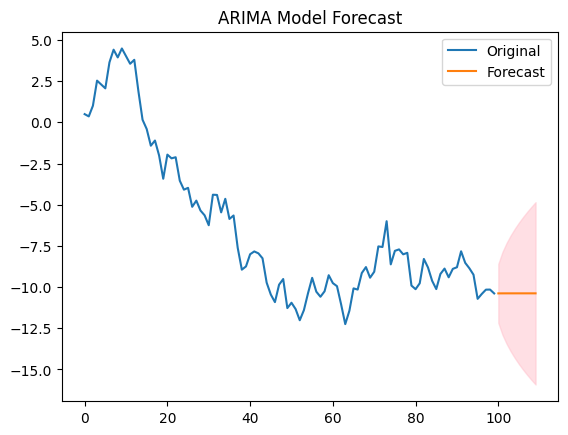

(-9.935113079295261, 2.75681271419173e-17, 0, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 235.58955115564768)


In [23]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Generate a series
np.random.seed(42)
series = np.random.normal(size=100).cumsum()

# Fit an ARIMA model
model = ARIMA(series, order=(1, 1, 1))
fit = model.fit()

# Summary of the model
print(fit.summary())

# Forecasting the next 10 values
forecast = fit.get_forecast(steps=10)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the series and the forecasts
plt.plot(series, label='Original')
plt.plot(np.arange(len(series), len(series) + 10), forecast_mean, label='Forecast')
plt.fill_between(np.arange(len(series), len(series) + 10), conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.5)
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

# Performing the ADF test to check for residuals
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(fit.resid)
print(adf_result)


In the code above, we first generate a random series to mimic real-world time series data. We then fit an ARIMA model to this series, specifying the order with the parameters (1,1,1), which means the model includes one autoregressive term, one difference, and one moving average term.